Bolded text = **do not change**

Italics text = *replace with your own words*


******************
*******************

# **Description of data**

*Describe your dataset and what you want to analyze*
 


My dataset contains play-by-play data for the Los Angeles Chargers during the 2020 NFL season. The dataset only contains designed run plays for the team, so it excludes all defensive, special teams, passing, and non-designed run plays (i.e. quarterback scrambles). The three main variables that I will focus on are "Yards," which takes the value of the amount of yards gained on the play, "RushDirection," which assigns the run play to one of seven directions, and "Formation," which provides information on the general offensive alignment for that play. Using these variables, I want to run a multi-variate linear regression to predict the amount of yards gained on a play by using pre-snap formation and rush direction as the independent variables.

*******************
*******************
# **Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

*******************
*******************
# **Functions used in notebook**

*If you write a function to help with any of your sections, please put that function here*

In [ ]:
# Functions that you develop

*******************
*******************
# **Getting data**

*Provide Pseudocode*

In [16]:
# Code for acquiring data
data = pd.read_csv("pbp-2020-final.csv")

In [17]:
# Remove rows that are all NA
data = data.dropna(how = "all")

In [4]:
# Display first 5 rows of data
print(data.head())

         GameId    GameDate  Quarter  ...  IsNoPlay        PenaltyType PenaltyYards
0  2.021010e+09    1/3/2021      3.0  ...       0.0                NaN          0.0
1  2.021010e+09    1/3/2021      3.0  ...       0.0  OFFENSIVE HOLDING         10.0
2  2.020121e+09  12/13/2020      1.0  ...       0.0                NaN          0.0
3  2.020121e+09  12/13/2020      1.0  ...       0.0                NaN          0.0
4  2.020122e+09  12/17/2020      3.0  ...       0.0                NaN          0.0

[5 rows x 41 columns]


In [5]:
# Display last 5 rows of data
print(data.tail())

           GameId   GameDate  Quarter  ...  IsNoPlay  PenaltyType PenaltyYards
425  2.020091e+09  9/13/2020      2.0  ...       0.0          NaN          0.0
426  2.020091e+09  9/13/2020      2.0  ...       0.0          NaN          0.0
427  2.020091e+09  9/13/2020      2.0  ...       0.0          NaN          0.0
428  2.020091e+09  9/13/2020      1.0  ...       0.0          NaN          0.0
429  2.020091e+09  9/13/2020      1.0  ...       0.0          NaN          0.0

[5 rows x 41 columns]


In [6]:
# Show data.info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 429
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   GameId                          430 non-null    float64
 1   GameDate                        430 non-null    object 
 2   Quarter                         430 non-null    float64
 3   Minute                          430 non-null    float64
 4   Second                          430 non-null    float64
 5   OffenseTeam                     430 non-null    object 
 6   DefenseTeam                     430 non-null    object 
 7   Down                            430 non-null    float64
 8   ToGo                            430 non-null    float64
 9   YardLine                        430 non-null    float64
 10  SeriesFirstDown                 430 non-null    float64
 11  NextScore                       430 non-null    float64
 12  Description                     430 

In [7]:
# Show data.describe
data.describe()

,GameId,Quarter,Minute,Second,Down,ToGo,YardLine,SeriesFirstDown,NextScore,TeamWin,SeasonYear,Yards,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,YardLineFixed,IsPenaltyAccepted,IsNoPlay,PenaltyYards
count,4.300000e+02,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.0,430.0,430.0,430.000000,430.0,430.0,430.0,430.000000,0.0,430.0,430.0,430.0,0.0,430.0,430.0,430.000000,430.000000,430.0,430.0,430.000000,430.000000,430.000000,430.000000
mean,2.020172e+09,2.544186,6.923256,28.265116,1.553488,7.837209,52.772093,0.232558,0.0,0.0,2020.0,3.930233,1.0,0.0,0.0,0.025581,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.013953,0.027907,0.0,0.0,27.846512,0.025581,0.013953,0.246512
std,2.341193e+05,1.153348,4.436148,17.978216,0.754582,4.119034,25.621490,0.422955,0.0,0.0,0.0,5.312146,0.0,0.0,0.0,0.158067,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.117434,0.164898,0.0,0.0,13.124105,0.158067,0.117434,1.706883
min,2.020091e+09,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.0,0.0,2020.0,-5.000000,1.0,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.020100e+09,2.000000,3.000000,13.000000,1.000000,5.000000,31.000000,0.000000,0.0,0.0,2020.0,1.000000,1.0,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,0.000000,0.0,0.0,20.000000,0.000000,0.000000,0.000000
50%,2.020111e+09,3.000000,7.000000,28.000000,1.000000,10.000000,48.500000,0.000000,0.0,0.0,2020.0,3.000000,1.0,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,0.000000,0.0,0.0,29.000000,0.000000,0.000000,0.000000
75%,2.020121e+09,4.000000,11.000000,43.000000,2.000000,10.000000,74.000000,0.000000,0.0,0.0,2020.0,5.000000,1.0,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,0.000000,0.0,0.0,38.000000,0.000000,0.000000,0.000000
max,2.021010e+09,5.000000,15.000000,59.000000,4.000000,28.000000,100.000000,1.000000,0.0,0.0,2020.0,36.000000,1.0,0.0,0.0,1.000000,NaN,0.0,0.0,0.0,NaN,0.0,0.0,1.000000,1.000000,0.0,0.0,49.000000,1.000000,1.000000,15.000000


***************
***************
# **Visualizing data**

*Provide relevant pseudocode*

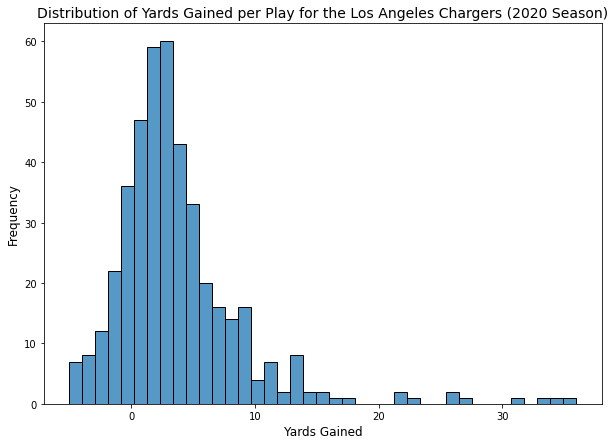

In [9]:
# visualization 1 - Histogram of yards gained
plt.figure(figsize = [10, 7])
vis1 = sns.histplot(x = data["Yards"], data = data)
vis1.set_xlabel("Yards Gained", fontsize = 12)
vis1.set_ylabel("Frequency", fontsize = 12)
vis1.set_title("Distribution of Yards Gained per Play for the Los Angeles Chargers (2020 Season)", fontsize = 14)
plt.show()

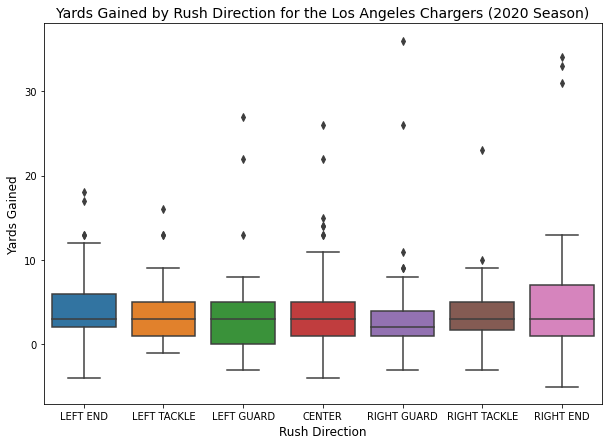

In [ ]:
# visualization 2 - Boxplot of yards gained by rush direction
plt.figure(figsize = [10, 7])
vis2 = sns.boxplot(x = data["RushDirection"], y = data["Yards"], data = data, order = ["LEFT END", "LEFT TACKLE", "LEFT GUARD", "CENTER", "RIGHT GUARD", "RIGHT TACKLE", "RIGHT END"])
vis2.set_xlabel("Rush Direction", fontsize = 12)
vis2.set_ylabel("Yards Gained", fontsize = 12)
vis2.set_title("Yards Gained by Rush Direction for the Los Angeles Chargers (2020 Season)", fontsize = 14)
plt.show()

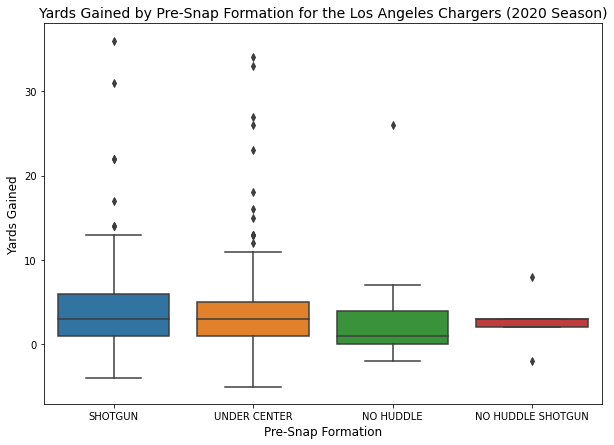

In [ ]:
# visualization 3 - Boxplot of yards gained by pre-snap formation
plt.figure(figsize = [10, 7])
vis3 = sns.boxplot(x = data["Formation"], y = data["Yards"], data = data)
vis3.set_xlabel("Pre-Snap Formation", fontsize = 12)
vis3.set_ylabel("Yards Gained", fontsize = 12)
vis3.set_title("Yards Gained by Pre-Snap Formation for the Los Angeles Chargers (2020 Season)", fontsize = 14)
plt.show()

In [ ]:
# visualization 4

In [ ]:
# visualization 5

In [ ]:
# visualization 6

***************
***************
# **Feature Engineering**

*If making specific choices (e.g., binning data, dummy coding, etc), please describe what you plan to do here*

*Provide relevant pseudocode*


Heatplot displaying where the missing data is located:


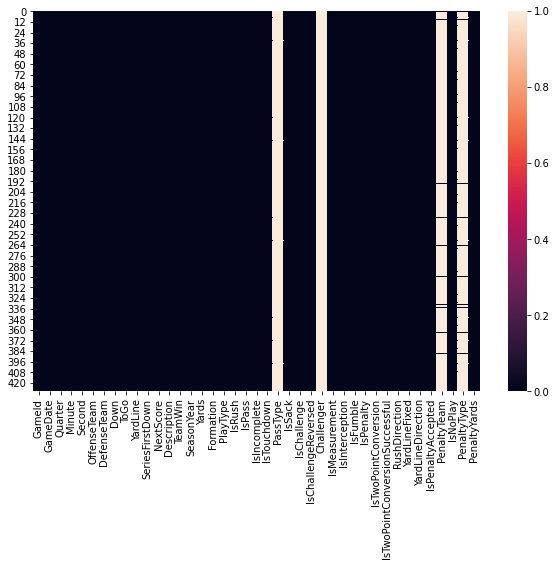


There are no null values for the variables we will be using (RushDirection, Formation, Yards)


In [10]:
# Check and take care of null values
print("Heatplot displaying where the missing data is located:")
plt.figure(figsize = [10, 7])
sns.heatmap(data.isnull())
plt.show()
print()

print("There are no null values for the variables we will be using (RushDirection, Formation, Yards)")

In [11]:
# Check and take care of string values

# List the variables you will be dummy coding
print("Variables to be dummy coded: RushDirection, Formation")

Variables to be dummy coded: RushDirection, Formation


In [19]:
# Check outliers for "Yards"
Q1 = data["Yards"].quantile(.25)
Q3 = data["Yards"].quantile(.75)
IQR = Q3 - Q1

over_outliers = data[data["Yards"] > (Q3 + (IQR * 1.5))]
under_outliers = data[data["Yards"] < (Q1 - (IQR * 1.5))]

print("There are", len(over_outliers) + len(under_outliers), "outliers values for the 'Yards' variable:")
print(over_outliers["Yards"], under_outliers["Yards"])
print()

# Remove outliers for "Yards"
data["Yards"] = np.where(data["Yards"] > (Q3 + (IQR * 1.5)), np.nan, data["Yards"])
data["Yards"] = np.where(data["Yards"] < (Q1 - (IQR * 1.5)), np.nan, data["Yards"])

# Show updated maximum
print("Maximum yards gained after removing outliers:")
print(data["Yards"].max())

There are 0 outliers values for the 'Yards' variable:
Series([], Name: Yards, dtype: float64) Series([], Name: Yards, dtype: float64)

Maximum yards gained after removing outliers:
11.0


In [15]:
# Any additional feature engineering

# Show whether or not there are duplicates
duplicates = data.duplicated().any()
print("Are there duplicates in the dataframe?", duplicates)

Are there duplicates in the dataframe? False


My next steps would be to decide whether or not to remove plays where there is a penalty accepted, as the penalty may have had an effect on the yardage gained on that particular play. I have already dropped rows where all of the data are NAs and the remaining NAs in the dataset make sense given my analysis. There are no duplicate values in the dataset (because each row is a unique run play), so we do not have to worry about dealing with duplicate rows. I will also need to create dummy variables for the variables "RushDirection" and "Formation" in order to use these variables to make predictions about yardage gained. For my analysis, I plan on running a multi-variate linear regression using the dummy-coded variables for "RushDirection" and "Formation" as my independent variables and "Yards" as my dependent variable. I plan on running regressions for both of the indpendent variables separately at first, and then combining the two together to see how well these variables predict yardage gained.

***************
***************
# **Analysis section**

*Provide relevant pseudocode for linear regression or classification*

In [ ]:
# Machine Learning 1

In [ ]:
# Machine Learning 2, if needed

***************
***************
# **Conclusions**

*Describe what you found and learned from your evaluation of your dataset*